# Read CSV into dataframe


In [1]:
# import pandas
import pandas as pd
# read csv file
# make sure that you out the file in the right path!
data_frame = pd.read_csv('data/data_project1.csv')

import warnings
warnings.simplefilter("ignore")

In [2]:
data_frame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data  Cleaning

In [3]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Age, Cabin and Embarked columns have missing entries. 
- Lets get rid of Cabin column (it is not relevant to the analysis of the data and we are missing a large portion of numbers)
- We need to find a way to populate the missing ages and embarked port.

In [4]:
missing_ports = data_frame[data_frame['Embarked'].isnull()]
missing_ports

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


As we only have two missing values for Embarked; I am dropping these rows. There are some other approaches though. For example, we can see other people from the same cabin or ticket numbers were travelling from which town, and assume these two are in departed from the same place. 

In [5]:
data_frame = data_frame[data_frame['Embarked'].notna()]

In [6]:
data_frame.groupby(['Sex','Pclass'])['Age'].mean()

Sex     Pclass
female  1         34.240964
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

populate the missing ages:
Use the mean age based on the Sex & Pclass


In [7]:
age_null = data_frame[data_frame['Age'].isnull()]

mean_ages = data_frame.groupby(['Sex','Pclass'])['Age'].mean()

def remove_na_ages(row):
    
#check if the age is null
#replace with the mean

    if pd.isnull(row['Age']):
        return mean_ages[row['Sex'],row['Pclass']]
    else:
        return row['Age']

#Apply a function along an axis of the DataFrame
data_frame['Age'] =data_frame.apply(remove_na_ages, axis=1)

Drop the unwanted column Cabin: 

In [8]:
data_frame = data_frame.drop(['Cabin'], axis=1)
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


Now, we see there are no null values for the features! So, we are good to go! 

# Survive!

- Lets see how many passengers survived?
- What was the average age of passengers?
- Which gender had a better chance of survival?
- Passengers from which class had a better chance of survival?




In [9]:
# number of survived vs not-survived
data_frame['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [10]:
data_frame["Age"].mean()

29.268361589286595

We see that the averagre age of passengers is about 30. But, lets use our visualization tools as well: 

In [11]:
# Import more libraries

import matplotlib.pyplot as plt
import seaborn as sns


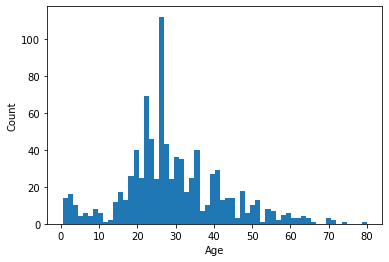

In [12]:
plt.hist(data_frame['Age'], bins=60)
plt.xlabel('Age')
plt.ylabel('Count')


plt.show()

Did women have a better chance of survival?

In [13]:
data_frame.groupby('Sex')['Survived'].mean()


Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64

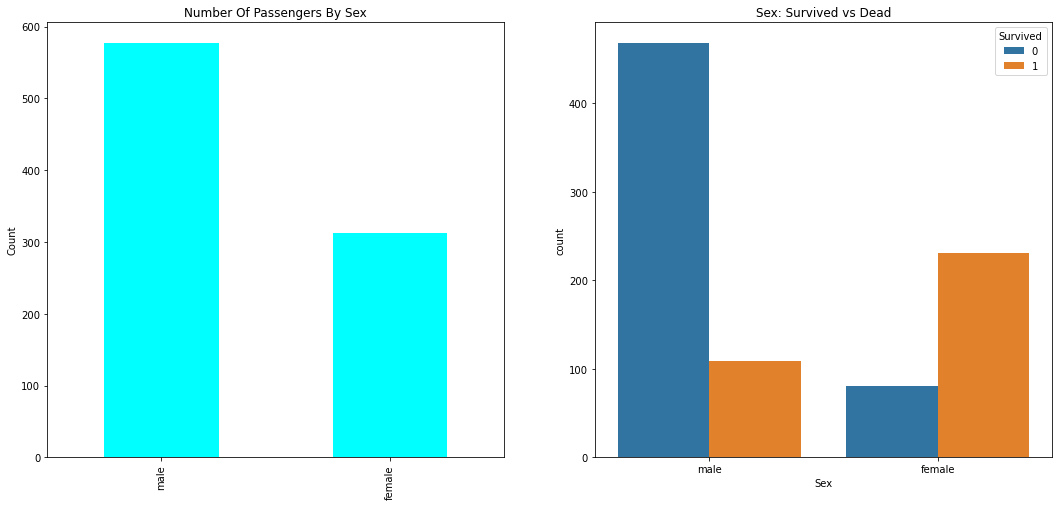

In [14]:

# show two subplots 
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
data_frame["Sex"].value_counts().plot.bar(color = "cyan", ax = ax[0])
ax[0].set_title("Number Of Passengers By Sex")
ax[0].set_ylabel("Count")
sns.countplot("Sex", hue = "Survived", data = data_frame, ax = ax[1])
ax[1].set_title("Sex: Survived vs Dead")


plt.show()



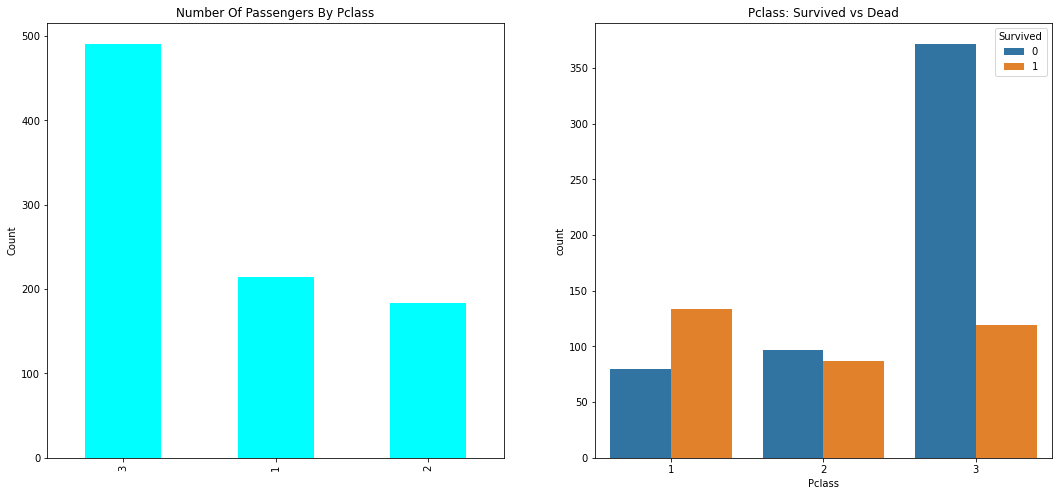

In [15]:
# show two subplots 

fig, ax = plt.subplots(1, 2, figsize = (18, 8))
data_frame["Pclass"].value_counts().plot.bar(color = "cyan", ax = ax[0])
ax[0].set_title("Number Of Passengers By Pclass")
ax[0].set_ylabel("Count")
sns.countplot("Pclass", hue = "Survived", data = data_frame, ax = ax[1])
ax[1].set_title("Pclass: Survived vs Dead")
plt.show()

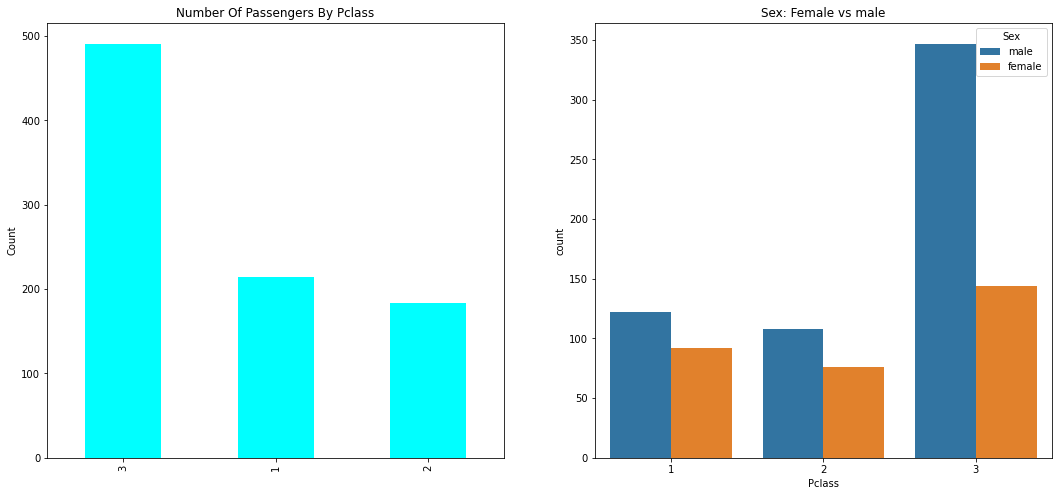

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
data_frame["Pclass"].value_counts().plot.bar(color = "cyan", ax = ax[0])
ax[0].set_title("Number Of Passengers By Pclass")
ax[0].set_ylabel("Count")
sns.countplot("Pclass", hue = "Sex", data = data_frame, ax = ax[1])
ax[1].set_title("Sex: Female vs male")
plt.show()

Finally, lets see how much on average a passenger paid (depending on the class) to get in. 

In [17]:
data_frame.groupby("Pclass")["Fare"].mean()



Pclass
1    84.193516
2    20.662183
3    13.675550
Name: Fare, dtype: float64